**Name:** Tushar Uttam Suroshe

**Roll No:** RBT21CB046

**Title:** Naive Bayes Classification implementation on Sms Spam Detection

**Aim:** The aim of this section is to perform spam detection using the Support vector machine algorithm.

Step 1: Importing Necessary Libraries

In this step, we import the necessary Python libraries that we'll be using throughout the code. These libraries include Pandas for data manipulation, NumPy for numerical operations, Matplotlib for data visualization, Seaborn for enhancing plots' aesthetics, and scikit-learn (sklearn) for machine learning tasks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm

Step 2: Loading and Visualizing Data

In this step, we load a CSV file named 'spam1.csv' into a Pandas DataFrame. The data is encoded with ISO-8859-1 to handle various character encodings. We then display the loaded DataFrame to get an overview of the data.

In [ ]:
df = pd.read_csv('spam1.csv', encoding="ISO-8859-1")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Step 3: Word Cloud for Spam Messages

In this step, we focus on spam messages. We filter the DataFrame to extract rows where the "Category" column is equal to 'spam'. We then create a Word Cloud from the text content of these spam messages and display it. This visualization helps us identify common words in spam messages.

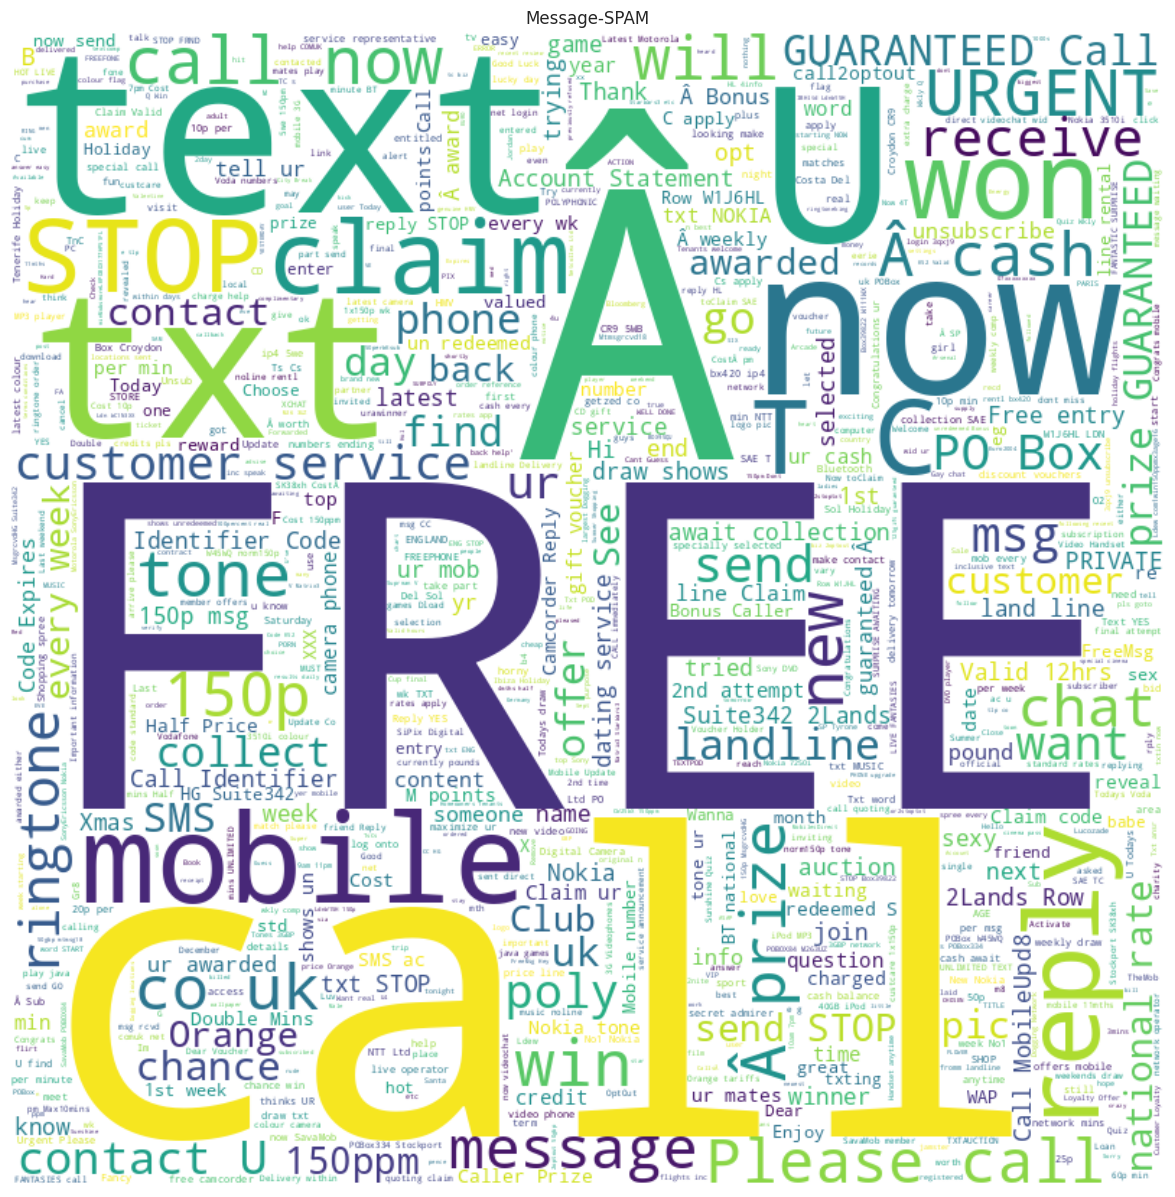

In [ ]:
spam = df[df["Category"]=='spam']
spam_words = " ".join(comment for comment in spam["Message"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                 contour_width=3, contour_color='firebrick').generate(spam_words)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-SPAM")
plt.axis("off")
plt.show()

Step 4: Word Cloud for Ham Messages

Similar to the previous step, here we focus on ham (non-spam) messages. We filter the DataFrame to extract rows where the "Category" column is equal to 'ham', create a Word Cloud from the text content of these ham messages, and display it.

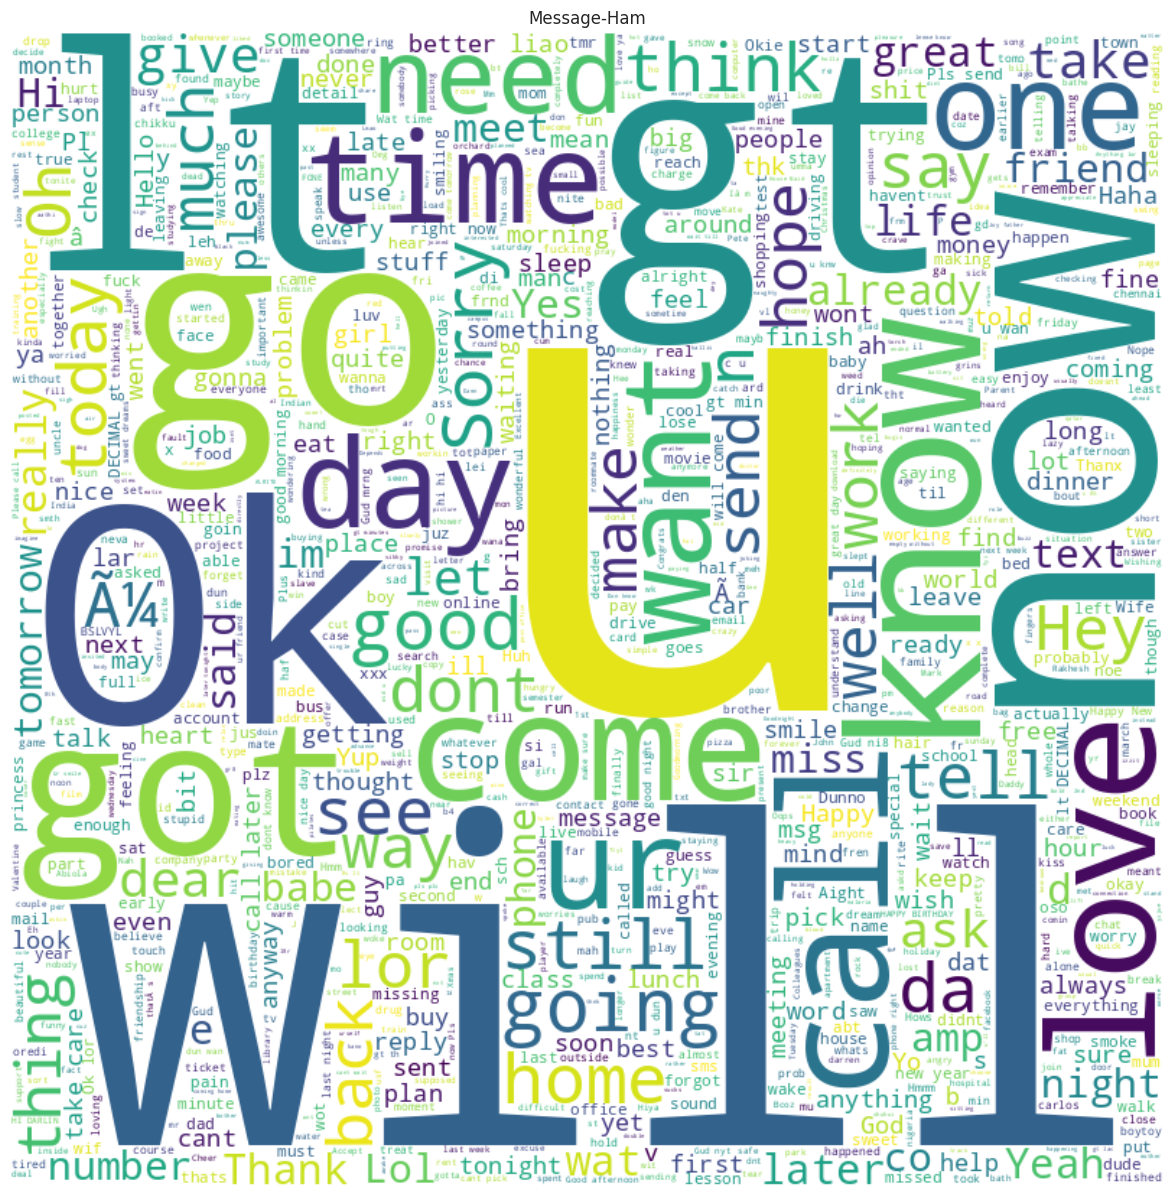

In [ ]:
ham = df[df["Category"]=='ham']

ham_words = " ".join(comment for comment in ham["Message"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                     contour_width=3, contour_color='firebrick').generate(ham_words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-Ham")
plt.axis("off")
plt.show()

Step 5: Text Preprocessing and Bag of Words (BoW) Representation

In this step, we preprocess the text data and convert it into a Bag of Words (BoW) representation using the CountVectorizer from scikit-learn. This creates a sparse matrix where each row represents a message, and each column represents a unique word.

In [ ]:
corpus = df['Message']
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

Step 6: Splitting Data and Training a Support Vector Machine (SVM) Classifier

Here, we split the data into training and testing sets. We then instantiate a Support Vector Machine (SVM) classifier using the svm.SVC() class.

In [ ]:
bow_df = pd.DataFrame(bow_matrix.toarray())
bow_df['label'] = df['Category'].values
X = bow_df.drop(['label'], axis=1) # Training set
y = bow_df[['label']] # Target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC() # Instantiate classifier

Step 7: Cross-Validation and Model Accuracy

In this step, we use cross-validation to assess the SVM model's performance. We calculate accuracy scores for three folds and print the results. The mean accuracy is displayed as the final model accuracy.

In [ ]:
accuracy = cross_val_score(clf, X.values, y.values, scoring='accuracy',cv=3)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.97308934 0.97469036 0.98276791]
Accuracy of Model with Cross Validation is: 97.68492031334804


Conclusion:
The code demonstrates a comprehensive process for analyzing and classifying text data as spam or ham using a Bag of Words representation and an SVM classifier. The word clouds provide a visual representation of common words in each category, and cross-validation is used to evaluate the model's accuracy.